In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import networkx as nx

def read_data(seed, time, directory):
    positions_file = f'Fig4_{int(seed*100)}_{time}_positions.csv'
    adjacency_file = f'Fig4_{int(seed*100)}_{time}_adjacency.csv'
    state_file = f'Fig4_{int(seed*100)}_{time}_state.csv'
    positions = pd.read_csv(os.path.join(directory, positions_file), header=None).values
    adjacency = pd.read_csv(os.path.join(directory, adjacency_file), header=None).values
    infect_state = pd.read_csv(os.path.join(directory, state_file), header=None).values
    return positions, adjacency, infect_state

directory = '../simulation_result/snapshots/'  # Specify the directory where CSV files are located
oberve_time = [1, 200, 400, 600]  # Observation times
seed_map = [0.1,0.25, 0.5]  # Seed maps
parameters = [(seed, time) for seed in seed_map for time in oberve_time]  # Combination of parameters

# Pre-load data into a dictionary
data = {}
for seed, time in parameters:
    data[(seed, time)] = read_data(seed, time, directory)


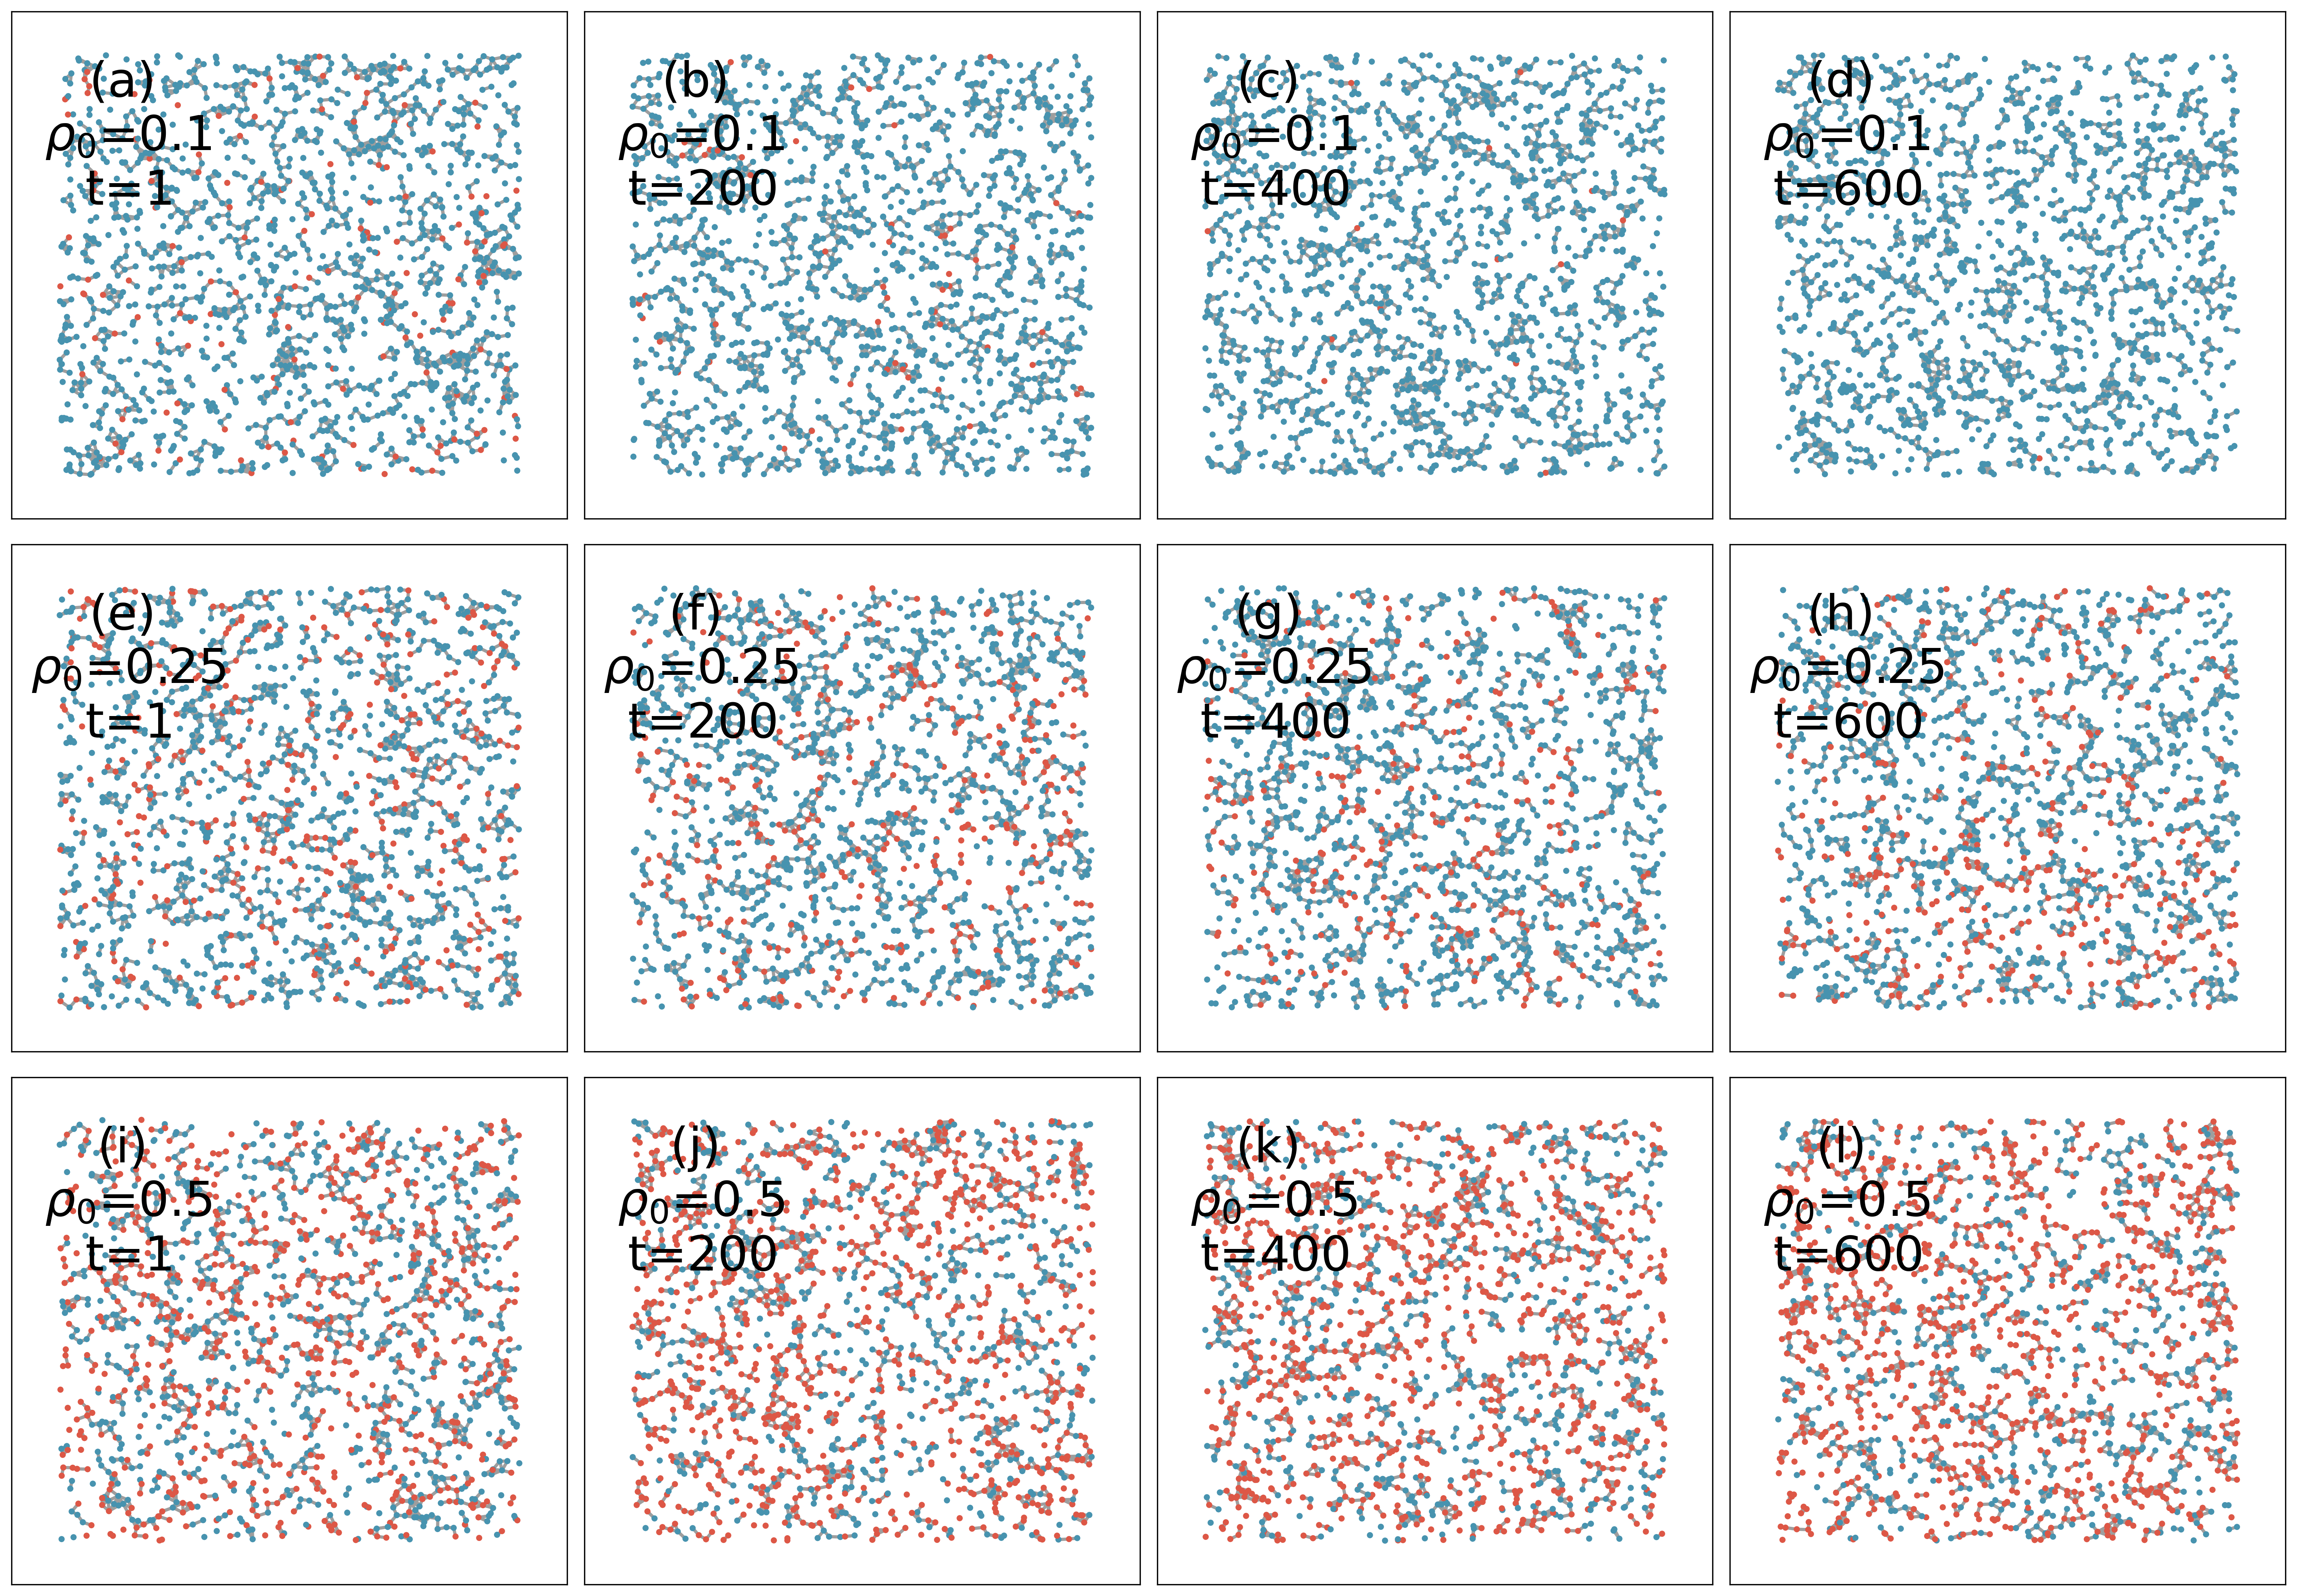

In [5]:

##################################################################

# Create a figure and axes for subplots
fig, axes = plt.subplots(len(seed_map), len(oberve_time), figsize=(20, 14),dpi = 300)

# Define title identifiers
title_identifiers = 'abcdefghijklmnopq'

for i, (seed, time) in enumerate(parameters):
    row = i // len(oberve_time)
    col = i % len(oberve_time)
    ax = axes[row, col]

    # Retrieve data from the pre-loaded dictionary
    positions, adjacency, infect_state = data[(seed, time)]

    # Create a NetworkX graph
    G = nx.from_numpy_array(adjacency)

    # Filter edges based on length (assuming periodic boundary conditions)
    edge_threshold = 20 # Adjust this threshold as needed
    edges_to_keep = [(u, v) for u, v in G.edges() if np.linalg.norm(np.array(positions[u]) - np.array(positions[v])) < edge_threshold]
    filtered_graph = nx.Graph()
    filtered_graph.add_edges_from(edges_to_keep)

    # Plot the network graph with node colors based on infection state
    ax.set_title(f'({title_identifiers[i]})\n $\\rho_0$={seed} \n t={time}', fontsize = 30,
                 x=0.2, y=0.6, horizontalalignment='center')

    pos = {i: (x, y) for i, (x, y) in enumerate(positions)}
    node_colors = ["#DD5746" if state == 1 else "#4793AF" for state in infect_state]
    node_list = range(len(positions))

    nx.draw_networkx_nodes(filtered_graph, pos, nodelist=node_list, node_color=node_colors, node_shape='o',
                    node_size=8, ax=ax)

    nx.draw_networkx_edges(filtered_graph, pos, edge_color='#9E9E9E', width=2, alpha=1, ax=ax)

    # Set axis labels
    # ax.set_xticks(range(0, 41, 10))
    # ax.set_yticks(range(0, 41, 10))
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')

# Adjust layout
plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig04_snapshots.pdf', format='pdf', bbox_inches='tight')
plt.show()
